# Project Overview
Predictive maintenance involves using data analytics to predict when equipment will fail, allowing for timely maintenance and reducing downtime. In this project, we use a dataset containing various features related to machine operations and failures to build a predictive model that can identify potential machine failures before they occur.

# Dataset Description
The dataset includes the following features:

UDI: Unique identifier for each record
Product ID: Identifier for the product
Type: Type of product (categorical)
Air temperature [K]: Air temperature in Kelvin
Process temperature [K]: Process temperature in Kelvin
Rotational speed [rpm]: Rotational speed in revolutions per minute
Torque [Nm]: Torque in Newton-meters
Tool wear [min]: Tool wear in minutes
Machine failure: Indicates if a machine failure occurred (target variable)
TWF: Tool wear failure
HDF: Heat dissipation failure
PWF: Power failure
OSF: Overstrain failure
RNF: Random failures

# Project Steps

# Step 1: Data Ingestion and Preprocessing
Load the Dataset
We load the dataset into a pandas DataFrame as well as libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('ai4i2020.csv')

In [3]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


# Data Cleaning
We check for and handle any missing values, and ensure data types are appropriate.

In [6]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df.fillna(method='ffill', inplace=True)

# Handle Categorical Data

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()


In [10]:
# Encode the 'Type' column
df['Type'] = label_encoder.fit_transform(df['Type'])

# Feature Enginnering

In [11]:
df['Temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']

In [12]:
# Another example: interaction feature between Torque and Rotational speed
df['Torque_speed_interaction'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']

# Step 2: Exploratory Data Analysis (EDA)

# Data Visualization
Visualize the data to understand its distribution and relationships.

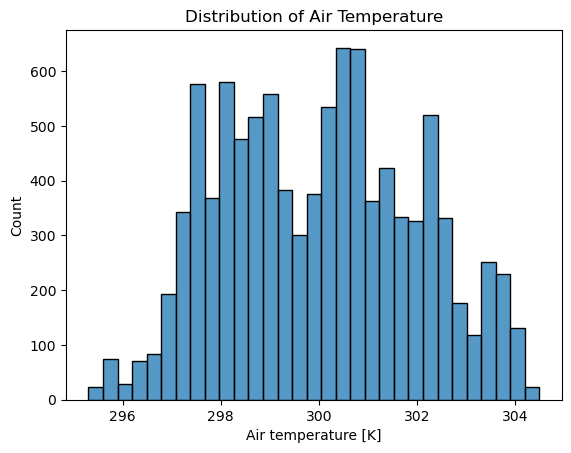

In [13]:
# Visualize the distribution of air temperature
sns.histplot(df['Air temperature [K]'])
plt.title('Distribution of Air Temperature')
plt.show()

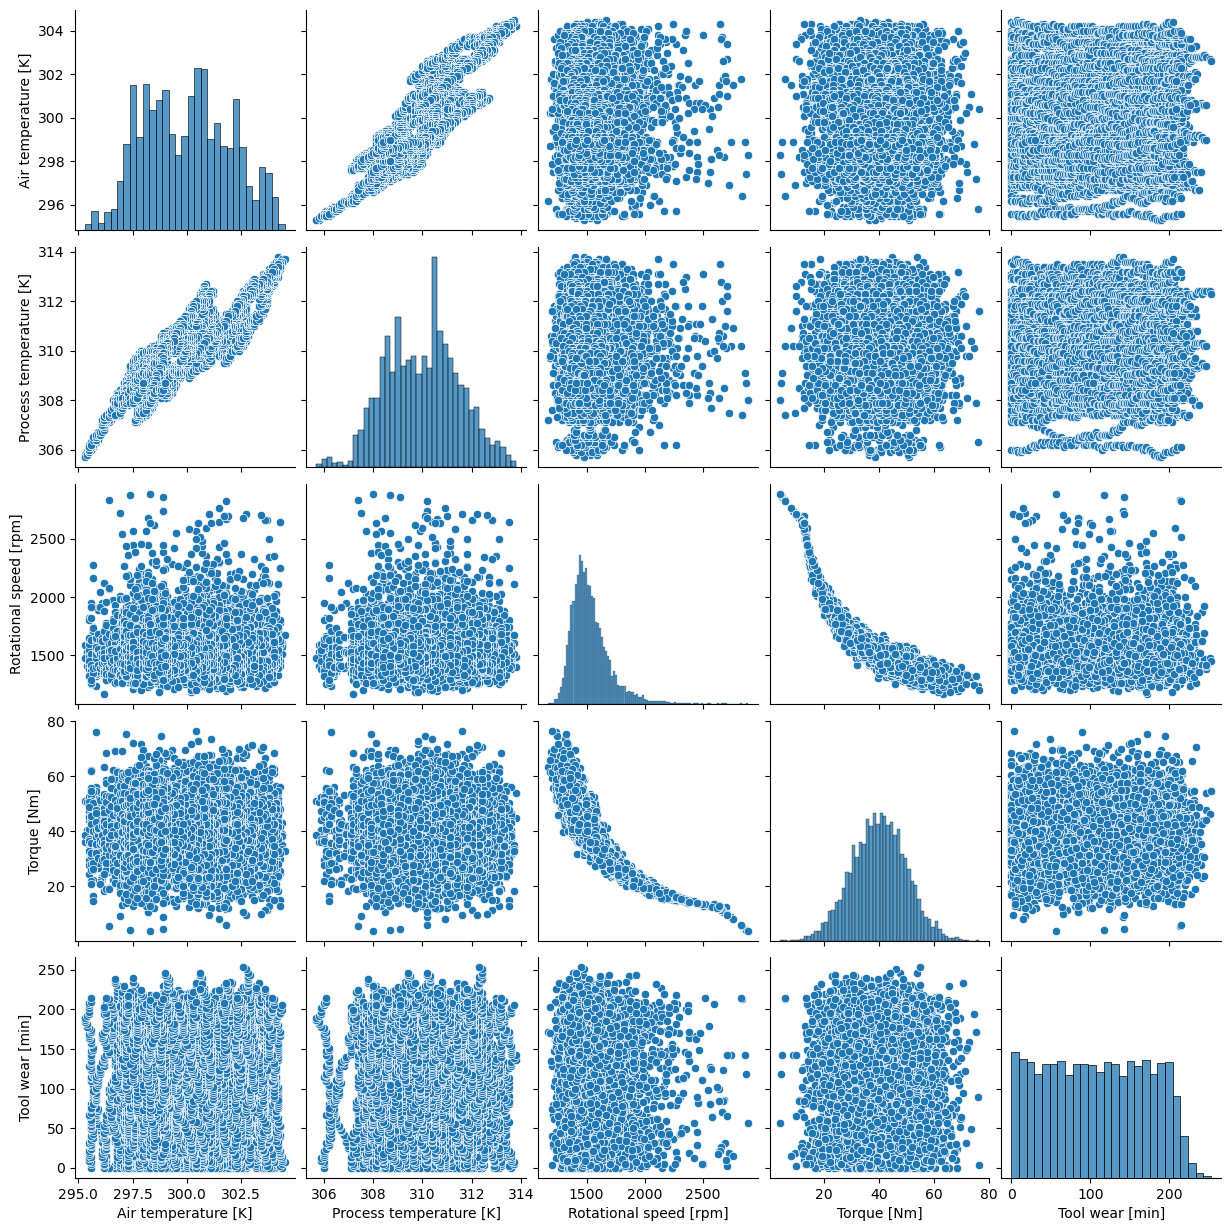

In [14]:
# Pair plot to see the relationship between features
sns.pairplot(df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
plt.show()

# Correlation Analysis

In [16]:
# Compute the correlation matrix
correlation_matrix = df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_10500\3036582683.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


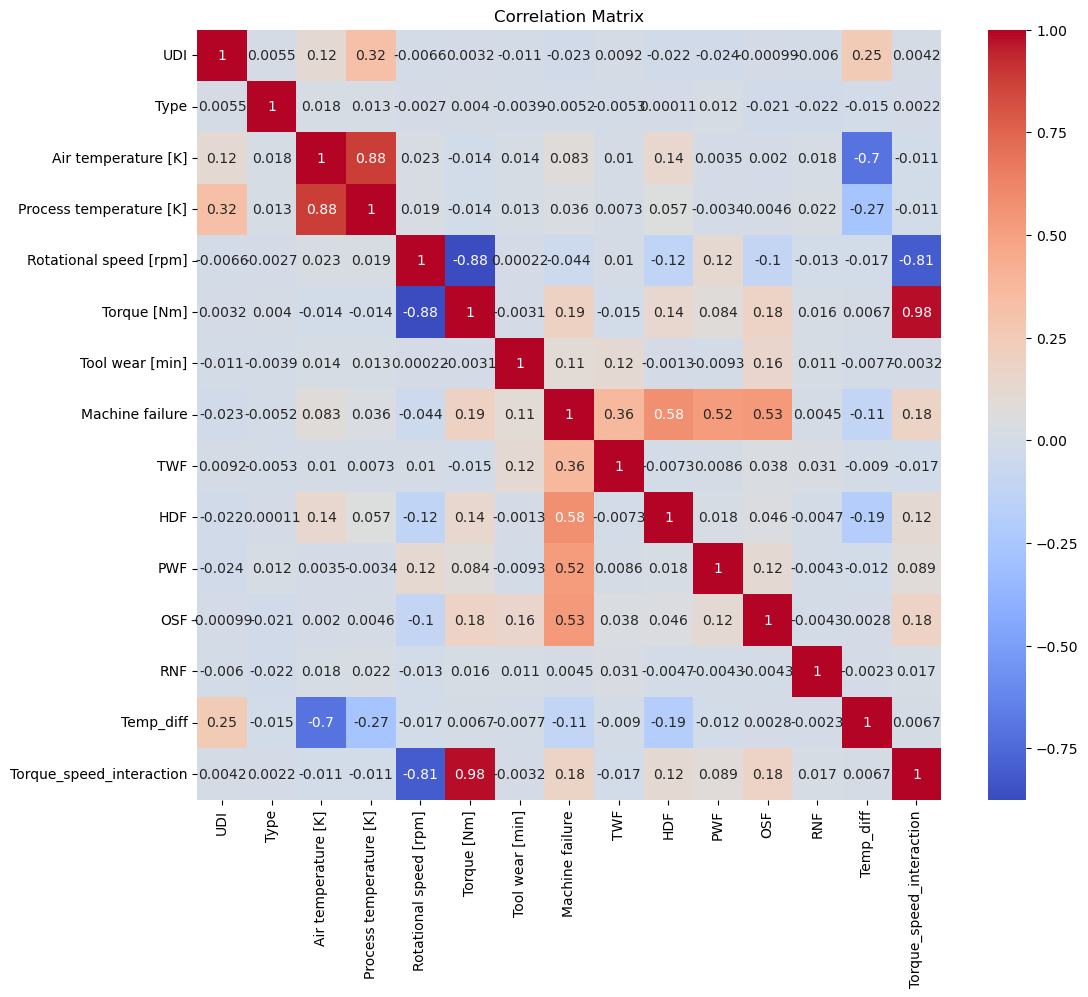

In [17]:
# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Model Training

In [18]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['Machine failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training

# Train-Test Split
Split the data into training and testing sets.

# Model Selection and Training
Select and train a machine learning model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [20]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

In [21]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predict on the test set
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      1.00      1939\n           1       0.96      0.72      0.82        61\n\n    accuracy                           0.99      2000\n   macro avg       0.97      0.86      0.91      2000\nweighted avg       0.99      0.99      0.99      2000\n'